#### Loading and preparing the PCam data for training deep learning models using tensorflow dataset (tfds)

In [2]:
#import os
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"   # Delete if you have GPU's available
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
 
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from keras import layers, losses
from keras.datasets import mnist
from keras.models import Model

import numpy as np 

import matplotlib.pyplot as plt 

from random import randint 

from keras import backend as K 

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D 

from keras.models import Model 

from keras.datasets import mnist 

from keras.callbacks import TensorBoard 





In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses

from tensorflow.keras.models import Model

Defining a function that splits images and labels and one-hot-encodes the labels

In [28]:
def convert_sample(sample):
    image, label = sample['image'], sample['label']  
    image = tf.image.convert_image_dtype(image, tf.float32)
    label = tf.one_hot(label, 2, dtype=tf.float32)
    return image, label


In [3]:
def convert_sample(sample):
    image, label = sample['image'], sample['label']  
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image, image  # Use the image itself as the target label

In [23]:
def convert_sample(sample):
    image, label = sample['image'], sample['label']  
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = image / 255.0
    return image, image

In [4]:
import tensorflow_datasets as tfds

# Corrected file path with escaped backslashes and a missing comma
ds1, ds2, ds3 = tfds.load('patch_camelyon',
                         split=['train[:20%]', 'test[:5%]', 'validation[:5%]'],
                         data_dir="C:\\Users\\caspe\\OneDrive\\Skrivebord\\AvendtML_Eksamen",
                         download=False,
                         shuffle_files=True)


Next we simple transform the data (by the function convert sample described previously) and getting ready for training by splitting it into batches.

In [5]:
train_dataset       = ds1.map(convert_sample).batch(32)
validation_dataset  = ds3.map(convert_sample).batch(32)
test_dataset        = ds2.map(convert_sample).batch(32)
print("Shape of the training data:", train_dataset)
print("Shape of the validation data:", validation_dataset)
print("Shape of the testing data:", test_dataset)

Shape of the training data: <_BatchDataset element_spec=(TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name=None))>
Shape of the validation data: <_BatchDataset element_spec=(TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name=None))>
Shape of the testing data: <_BatchDataset element_spec=(TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name=None))>


In [ ]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Reshape, UpSampling2D, Dropout, Conv2DTranspose 

def build_autoencoder(input_shape,dropout_rate=0.2):
    input_layer = Input(shape=input_shape)

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded_layer = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded_layer = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoded_layer)

    return autoencoder

# Assuming input image shape is (96, 96, 3) for a 96x96px color image
input_shape = (96, 96, 3)
autoencoder = build_autoencoder(input_shape)
dropout_rate = 0.2  # Modify the dropout rate as per your preference 
early_stopping = EarlyStopping(monitor='val_loss', patience=3) 

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')  # You can use other loss functions depending on your task


# Train the autoencoder
autoencoder.fit(
    train_dataset,
    epochs=5,
    batch_size=256,
    shuffle=True,
    validation_data=validation_dataset,
    callbacks=[TensorBoard(log_dir='/tmp/autoencoder'), early_stopping]
)


1/1 [==============================] - 0s 314ms/step


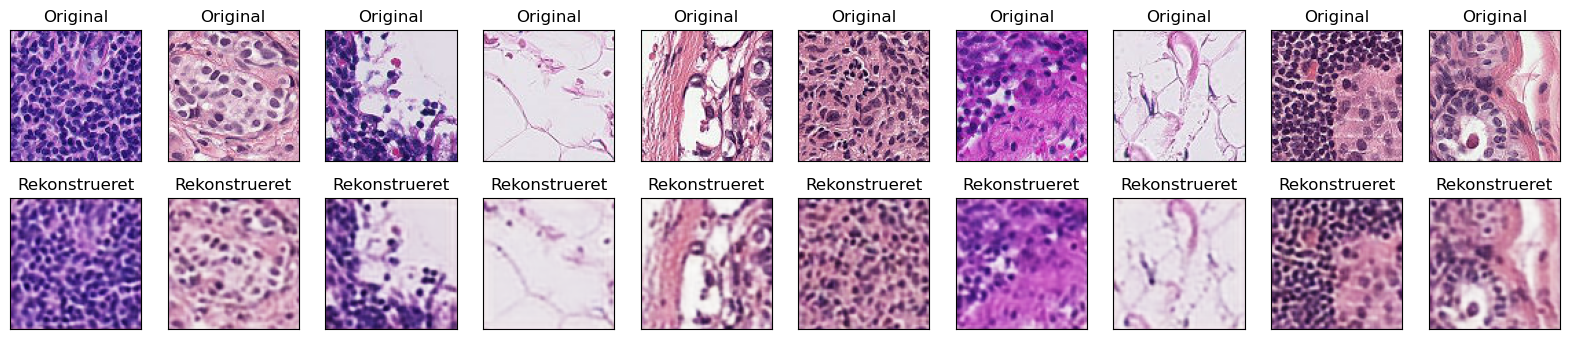

Mean Squared Error: 0.011999815702438354


In [34]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Antal billeder at vise
n = 10

# Hent nogle eksempler fra testdatasættet
samples = next(iter(test_dataset))[0][:n]  # Brug kun inputbilleder

# Generer rekonstruerede billeder fra de originale billeder
reconstructed_images = autoencoder.predict(samples)

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.title("Original")
    plt.imshow(tf.squeeze(samples[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display rekonstruktion
    bx = plt.subplot(2, n, i + 1 + n)
    plt.title("Rekonstrueret")
    plt.imshow(tf.squeeze(reconstructed_images[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)

plt.show()

from sklearn.metrics import mean_squared_error
import tensorflow as tf

# Assuming 'samples' contains original images and 'reconstructed_images' contains corresponding reconstructed images

# Reshape the arrays to 2D (flatten each image)
samples_flat = tf.reshape(samples, (samples.shape[0], -1))
reconstructed_flat = tf.reshape(reconstructed_images, (reconstructed_images.shape[0], -1))

# Convert EagerTensor to numpy arrays
samples_flat = samples_flat.numpy()
reconstructed_flat = reconstructed_flat.numpy()

# Calculate Mean Squared Error
mse = mean_squared_error(samples_flat, reconstructed_flat)
print(f"Mean Squared Error: {mse}")



In [ ]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Reshape, UpSampling2D, Dropout, Conv2DTranspose 

def build_autoencoder(input_shape,dropout_rate=0.2):
    input_layer = Input(shape=input_shape)

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded_layer = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded_layer = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoded_layer)

    return autoencoder

# Assuming input image shape is (96, 96, 3) for a 96x96px color image
input_shape = (96, 96, 3)
autoencoder = build_autoencoder(input_shape)
dropout_rate = 0.2  # Modify the dropout rate as per your preference 
early_stopping = EarlyStopping(monitor='val_loss', patience=3) 

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')  # You can use other loss functions depending on your task


# Train the autoencoder
history = autoencoder.fit(train_dataset,
                          validation_data=validation_dataset,
                          epochs=10,
                          batch_size=32
                          )


# Evaluate performance (you may use a validation set or a separate test set)
loss = autoencoder.evaluate(test_dataset, verbose=1)


# Access the training history
loss = history.history['loss']
val_loss = history.history['val_loss']


# Plot the training progress
import matplotlib.pyplot as plt

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

def build_autoencoder(input_shape, dropout_rate=0.2, l1_weight=0.001):
    input_layer = Input(shape=input_shape)

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l1(l1_weight))(input_layer)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l1(l1_weight))(x)
    encoded_layer = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(16, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l1(l1_weight))(encoded_layer)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l1(l1_weight))(x)
    x = UpSampling2D((2, 2))(x)
    decoded_layer = Conv2D(3, (3, 3), activation='sigmoid', padding='same', kernel_regularizer=tf.keras.regularizers.l1(l1_weight))(x)

    autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoded_layer)

    return autoencoder

# Assuming input image shape is (96, 96, 3) for a 96x96px color image
input_shape = (96, 96, 3)
autoencoder = build_autoencoder(input_shape)
dropout_rate = 0.2  # Modify the dropout rate as per your preference 
l1_weight = 1e-5  # You can adjust the L1 regularization strength

early_stopping = EarlyStopping(monitor='val_loss', patience=3) 

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')  # You can use other loss functions depending on your task

# Train the autoencoder
history = autoencoder.fit(train_dataset,
                          validation_data=validation_dataset,
                          epochs=10,
                          batch_size=32,
                          callbacks=[early_stopping])

# Evaluate performance (you may use a validation set or a separate test set)
loss = autoencoder.evaluate(test_dataset, verbose=1)

# Access the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training progress
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
# Med weight regularization l2,dropout 0.2

In [16]:
from tensorflow.keras import regularizers

def build_autoencoder(input_shape, dropout_rate=0.5, l2_weight=0.001):
    input_layer = Input(shape=input_shape)

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(l2_weight))(input_layer)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(l2_weight))(x)
    encoded_layer = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(16, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(l2_weight))(encoded_layer)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(l2_weight))(x)
    x = UpSampling2D((2, 2))(x)
    decoded_layer = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoded_layer)

    return autoencoder




1/1 [==============================] - 0s 358ms/step


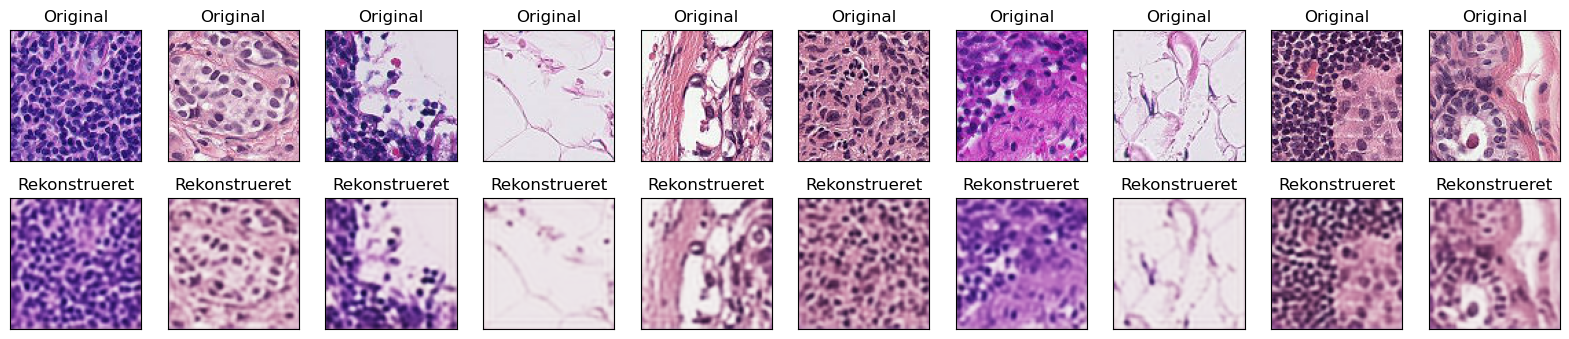

Mean Squared Error: 0.013054966926574707


In [20]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Antal billeder at vise
n = 10

# Hent nogle eksempler fra testdatasættet
samples = next(iter(test_dataset))[0][:n]  # Brug kun inputbilleder

# Generer rekonstruerede billeder fra de originale billeder
reconstructed_images = autoencoder.predict(samples)

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.title("Original")
    plt.imshow(tf.squeeze(samples[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display rekonstruktion
    bx = plt.subplot(2, n, i + 1 + n)
    plt.title("Rekonstrueret")
    plt.imshow(tf.squeeze(reconstructed_images[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)

plt.show()

from sklearn.metrics import mean_squared_error
import tensorflow as tf

# Assuming 'samples' contains original images and 'reconstructed_images' contains corresponding reconstructed images

# Reshape the arrays to 2D (flatten each image)
samples_flat = tf.reshape(samples, (samples.shape[0], -1))
reconstructed_flat = tf.reshape(reconstructed_images, (reconstructed_images.shape[0], -1))

# Convert EagerTensor to numpy arrays
samples_flat = samples_flat.numpy()
reconstructed_flat = reconstructed_flat.numpy()

# Calculate Mean Squared Error
mse = mean_squared_error(samples_flat, reconstructed_flat)
print(f"Mean Squared Error: {mse}")



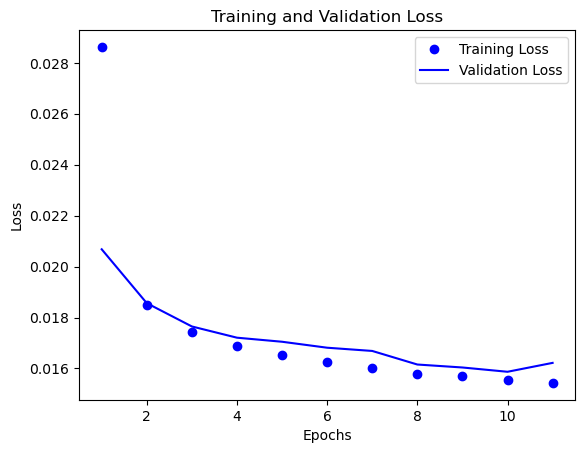

In [21]:
import matplotlib.pyplot as plt

# Get training and validation loss from history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# træningshistorikken i variablerne loss og val_loss, indeholder tabet (loss) for træning og validering for hver epoke. Disse kan bruges til at plotte træningsforløbet og vurdere, hvordan modellen præsterede over tid.

Epoch 1/11
1639/1639 [==============================] - 553s 335ms/step - loss: 0.0286 - val_loss: 0.0207
Epoch 2/11
1639/1639 [==============================] - 542s 330ms/step - loss: 0.0185 - val_loss: 0.0186
Epoch 3/11
1639/1639 [==============================] - 540s 329ms/step - loss: 0.0174 - val_loss: 0.0176
Epoch 4/11
1639/1639 [==============================] - 545s 332ms/step - loss: 0.0169 - val_loss: 0.0172
Epoch 5/11
1639/1639 [==============================] - 544s 332ms/step - loss: 0.0165 - val_loss: 0.0170
Epoch 6/11
1639/1639 [==============================] - 543s 332ms/step - loss: 0.0163 - val_loss: 0.0168
Epoch 7/11
1639/1639 [==============================] - 532s 325ms/step - loss: 0.0160 - val_loss: 0.0167
Epoch 8/11
1639/1639 [==============================] - 538s 328ms/step - loss: 0.0158 - val_loss: 0.0162
Epoch 9/11
1639/1639 [==============================] - 535s 326ms/step - loss: 0.0157 - val_loss: 0.0160
Epoch 10/11
1639/1639 [=======================

c:\Users\caspe\anaconda3\anaconda4\envs\ENV_NAME\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 6s 116ms/step - loss: 0.0151


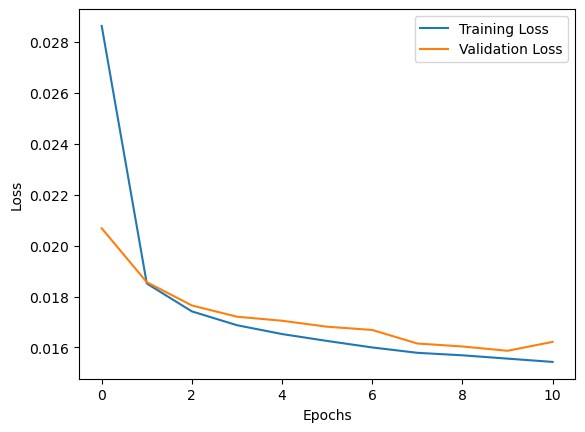

In [19]:
import tensorflow as tf

# Assuming input image shape is (96, 96, 3) for a 96x96px color image
input_shape = (96, 96, 3)
autoencoder = build_autoencoder(input_shape, dropout_rate=0.5, l2_weight=0.001)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = autoencoder.fit(
    train_dataset,
    epochs=11,
    shuffle=True,
    validation_data=validation_dataset,
    callbacks=[tf.keras.callbacks.TensorBoard(log_dir='/tmp/autoencoder'), early_stopping]
)

# Save the autoencoder model
autoencoder.save("autoencoder_model.h5")

# Evaluate performance on the test set
test_loss = autoencoder.evaluate(test_dataset, verbose=1)

# Access the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training progress
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
print("Test Loss:", test_loss)

Test Loss: 0.015117930248379707
